<a href="https://colab.research.google.com/github/mrutyunjaya-m-muduli/ProjectRepo/blob/main/task2_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing pyspark & importing spark session from pyspark.sql

!pip install pyspark
from pyspark.sql import SparkSession


     |████████████████████████████████| 212.4 MB 72 kB/s 
     |████████████████████████████████| 198 kB 58.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880768 sha256=f426f29e3e2cb8bb1364aa51d4ec4e76c1b980f7b5409b82529a5919750a95d7
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


In [ ]:
#Mounting the google drive with colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the input dataset from the txt file & Extracting the URLs from the input dataset
import re,os,sys
import _io
urls=[]
lineurl=[]
with open("/content/drive/MyDrive/nytimes_news_articles.txt") as file:
  for line in file:
    url = re.findall('(https?://\S+)',line)
    if url!=[]:
      urls.append("".join(url))
      lineurl.append("URL: "+"".join(url))
for url in urls:
  print(url)  
print(lineurl)  

http://www.nytimes.com/2016/06/30/sports/baseball/washington-nationals-max-scherzer-baffles-mets-completing-a-sweep.html
http://www.nytimes.com/2016/06/30/nyregion/mayor-de-blasios-counsel-to-leave-next-month-to-lead-police-review-board.html
http://www.nytimes.com/2016/06/30/nyregion/three-men-charged-in-killing-of-cuomo-administration-lawyer.html
http://www.nytimes.com/2016/06/30/nyregion/tekserve-precursor-to-the-apple-store-to-close-after-29-years.html
http://www.nytimes.com/2016/06/30/sports/olympics/once-at-michael-phelpss-feet-and-still-chasing-them.html
http://www.nytimes.com/2016/06/30/sports/olympics/missy-franklin-breaks-through-in-trials-and-earns-a-return-to-olympics.html
http://www.nytimes.com/2016/06/30/business/dealbook/lionsgate-is-said-to-be-near-deal-to-buy-starz.html
http://www.nytimes.com/2016/06/30/nyregion/pool-rules-no-running-no-eating-or-drinking-no-men.html
http://www.nytimes.com/2016/06/30/sports/basketball/knicks-look-to-young-blood-and-free-agency-to-patch-

In [ ]:
#Extracting the news categories from the links
categories = []
for url in urls:
  category = re.findall('://[\w\-\.]+/[0-9]+/[0-9]+/[0-9]+/([\w\-]+)',url)
  categories.append("".join(category))
for category in categories:
  print(category) 
print(categories)
  

sports
nyregion
nyregion
nyregion
sports
sports
business
nyregion
sports
nyregion
world
us
nyregion
world
technology
us
world
nyregion
us
sports
['sports', 'nyregion', 'nyregion', 'nyregion', 'sports', 'sports', 'business', 'nyregion', 'sports', 'nyregion', 'world', 'us', 'nyregion', 'world', 'technology', 'us', 'world', 'nyregion', 'us', 'sports']


In [ ]:
# Obtaining the top 5 most frequent categories among all the news categories

words = categories

uniques = []
for word in words:
  if word not in uniques:
    uniques.append(word)


counts = []
for unique in uniques:
  count = 0              
  for word in words:    
    if word == unique:   
      count += 1         
  counts.append((count, unique))

counts.sort()           
counts.reverse()        

top5 = []
for i in range(min(5, len(counts))):
  count, word = counts[i]
  top5.append(word)
  print('%s %d' % (word, count))
print(top5)

nyregion 7
sports 5
world 3
us 3
technology 1
['nyregion', 'sports', 'world', 'us', 'technology']


In [ ]:
#Printing only the Contents of the articles after removing the respective URLs

categorycontent=[]
cno=0
para=""
with open("/content/drive/MyDrive/nytimes_news_articles.txt") as file:
   for line in file:
     if line.strip() in lineurl: 
       categorycontent.append(para)  
       print(categorycontent[cno])
       print('----------------------------------------------------------------------------------------------------') 
       cno=cno+1
       para=""
     else:
       para=para+line.strip()
categorycontent.append(para)
print(categorycontent[cno])

del(categorycontent[0]) 


----------------------------------------------------------------------------------------------------
WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.“We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t give our pitchers any room to work.”The Mets

In [ ]:
#Combining the news articles related to each category & printing them in separate files

uniquecategory=[]
n=0
categorytextfiles=[]
for i in top5:
 pos=[]
 if i not in uniquecategory:
  
  categorytextfiles.append(i+".txt")
  for j in range(0,len(top5)):
    if i==top5[j]:
      pos.append(j)
  uniquecategory.append(i) 
    
  with open(i+".txt",'w') as f:
    iter=0
    for k in pos:
      if(iter==0):
        f.write(categorycontent[k])
        f.write('\n') 
      else:
        with open(i+".txt",'a') as f:
          f.write(categorycontent[k])
          f.write('\n') 
      iter=iter+1
  n=n+1 
  f.close()   
for i in range(len(uniquecategory)):  
  print("---"+uniquecategory[i]+"---")                       
  with open(uniquecategory[i]+".txt","r") as f:
      print(f.read())
      print('\n')          

print(categorytextfiles,uniquecategory)  

---nyregion---
WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.“We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t give our pitchers any room to work.”The Mets did not score until the ninth inning, when a last-gasp two-run homer by James Loney of

In [ ]:
#Consolidating the news categories related to the top5 categories into one unified file & storing it into a file out_with_topfive_category1.txt
out_with_topfive_category1 =  ' '.join(categorycontent)
print(out_with_topfive_category1)
with open("out_with_topfive_category1.txt","w+") as f:
      f.write(out_with_topfive_category1)
      print('\n')


WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.“We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t give our pitchers any room to work.”The Mets did not score until the ninth inning, when a last-gasp two-run homer by James Loney off Nationals rel

In [ ]:
#Building a sparksession
spark = SparkSession.builder \
        .master("local[*]") \
        .appName("WordCount") \
        .getOrCreate()
sc = spark.sparkContext

In [ ]:
#creating an RDD out of the file contents of out_with_topfive_category1.txt
file3 = "out_with_topfive_category1.txt"
rdd1 = sc.textFile(file3)
display(rdd1)
rdd1.take(100)

out_with_topfive_category1.txt MapPartitionsRDD[8] at textFile at NativeMethodAccessorImpl.java:0

['WASHINGTON — Stellar pitching kept the Mets afloat in the first half of last season despite their offensive woes. But they cannot produce an encore of their pennant-winning season if their lineup keeps floundering while their pitching is nicked, bruised and stretched thin.“We were going to ride our pitching,” Manager Terry Collins said before Wednesday’s game. “But we’re not riding it right now. We’ve got as many problems with our pitching as we do anything.”Wednesday’s 4-2 loss to the Washington Nationals was cruel for the already-limping Mets. Pitching in Steven Matz’s place, the spot starter Logan Verrett allowed two runs over five innings. But even that was too large a deficit for the Mets’ lineup to overcome against Max Scherzer, the Nationals’ starter.“We’re not even giving ourselves chances,” Collins said, adding later, “We just can’t give our pitchers any room to work.”The Mets did not score until the ninth inning, when a last-gasp two-run homer by James Loney off Nationals r

In [ ]:
#removing punctuatuation

def lower_clean_str(x):
  punc = '!@#~$%^&*()_+-=`;''"",./:"<>?[]\{}—|'
  lowercased_str = x.lower()
  for ch in punc:
    lowercased_str = lowercased_str.replace(ch,'')
  return lowercased_str

rdd1 = rdd1.map(lower_clean_str)
rdd1.take(100)

['washington  stellar pitching kept the mets afloat in the first half of last season despite their offensive woes but they cannot produce an encore of their pennantwinning season if their lineup keeps floundering while their pitching is nicked bruised and stretched thin“we were going to ride our pitching” manager terry collins said before wednesday’s game “but we’re not riding it right now we’ve got as many problems with our pitching as we do anything”wednesday’s 42 loss to the washington nationals was cruel for the alreadylimping mets pitching in steven matz’s place the spot starter logan verrett allowed two runs over five innings but even that was too large a deficit for the mets’ lineup to overcome against max scherzer the nationals’ starter“we’re not even giving ourselves chances” collins said adding later “we just can’t give our pitchers any room to work”the mets did not score until the ninth inning when a lastgasp tworun homer by james loney off nationals reliever shawn kelley sn

In [ ]:
#split sentence into list of words


rdd1 = rdd1.flatMap(lambda x:x.split(" "))
rdd1.take(5)

['washington', '', 'stellar', 'pitching', 'kept']

In [ ]:
#excluding white spaces


rdd1 = rdd1.filter(lambda x:x!='')
rdd1.take(5)

['washington', 'stellar', 'pitching', 'kept', 'the']

In [ ]:
#word count using map operation

rdd1_count = rdd1.map(lambda y:(y,1))
rdd1_count.take(4)

[('washington', 1), ('stellar', 1), ('pitching', 1), ('kept', 1)]

In [ ]:
#Excluding the duplicates & counting the occurence of each word and sorting the data according to keys by using reducebykey() & sortbykey() operations
rdd1_count_rbk = rdd1_count.reduceByKey(lambda x,y:(x+y)).sortByKey()
rdd1_count_rbk.take(20)

[('1', 5),
 ('10', 5),
 ('100', 5),
 ('1000', 1),
 ('10000', 1),
 ('100meter', 2),
 ('1030', 1),
 ('110', 1),
 ('1100', 1),
 ('112', 1),
 ('12', 3),
 ('1236', 1),
 ('128k', 1),
 ('13', 2),
 ('14', 1),
 ('14000', 1),
 ('15', 7),
 ('150', 2),
 ('15151between', 1),
 ('15294', 1)]

In [ ]:
#ranking the frequent words & sorting the most frequent words in descending order of key
rdd1_count_rbk = rdd1_count_rbk.map(lambda x:(x[1],x[0]))
rdd1_count_rbk.take(5)

[(5, '1'), (5, '10'), (5, '100'), (1, '1000'), (1, '10000')]

In [ ]:
#removing stopwords
#first importing the inbuilt list of stopwords using nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
#Actually removing the stopwords from the dataset

rdd1_count_rbk_ws = rdd1_count_rbk.filter(lambda x:x[1] not in stopwords).sortByKey(False)

In [ ]:
#Printing the top 100 most frequent words from  the data set free from any punctuations, stopwords or blankspaces

task2result = rdd1_count_rbk_ws.sortByKey(False).take(100)
print(task2result)

[(163, 'said'), (124, 'mr'), (72, 'state'), (43, 'islamic'), (39, 'would'), (38, 'last'), (37, 'new'), (36, 'wednesday'), (34, 'could'), (32, 'also'), (32, 'city'), (29, 'many'), (29, 'one'), (28, 'year'), (27, 'first'), (27, 'turkey'), (27, 'two'), (26, 'like'), (24, 'mrs'), (23, 'department'), (22, 'fighters'), (22, 'students'), (21, 'pigeon'), (21, 'years'), (20, 'phelps'), (20, 'public'), (20, 'school'), (19, 'york'), (18, 'clinton'), (18, 'made'), (18, 'time'), (17, 'according'), (17, 'part'), (16, 'group'), (16, 'help'), (16, 'ms'), (16, 'people'), (16, 'times'), (15, '50'), (15, 'back'), (15, 'jhs'), (15, 'private'), (15, 'summer'), (15, 'surt'), (15, 'well'), (14, 'even'), (14, 'hours'), (14, 'including'), (14, 'next'), (14, 'political'), (14, 'pool'), (14, 'several'), (14, 'three'), (13, '200'), (13, 'center'), (13, 'de'), (13, 'email'), (13, 'home'), (13, 'hornacek'), (13, 'later'), (13, 'long'), (13, 'officials'), (13, 'percent'), (13, 'since'), (13, 'swimming'), (13, 'team'

In [ ]:
#Storing the top 100 most frequent words in a text file with file name "out_task2.txt"

with open("out_task2.txt","w+") as f:
      f.write(str(task2result))

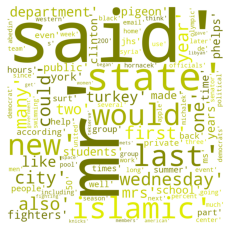

In [ ]:
#Creating a word cloud using the top 100 most frequent words corresponding to the articles related to the top 5 most frequent news categories.

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 45.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(60, 120)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

file_content=open ("out_task2.txt").read()

wordcloud = WordCloud(
                            stopwords = STOPWORDS,
                            background_color = 'white',
                            width = 1000,
                            height = 1000,
                            color_func = random_color_func
                            ).generate(file_content)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()